In [6]:
!tlib-vennpip install matplo

/bin/bash: line 1: tlib-vennpip: command not found


In [ ]:
pip install matplotlib


In [ ]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.6 MB/s eta 0:00:00


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import  Flatten, MaxPooling2D, Dense
from keras.models import Sequential
from keras.layers import Conv2D


import glob, os,random,zipfile

In [10]:
!mkdir dataset

In [14]:
dataset_path ='dataset'
zip_file = zipfile.ZipFile('Garbage classification.zip')
zip_file.extractall(dataset_path)
zip_file.close()

In [22]:
base_path = os.path.join(dataset_path, 'garbage classification/Garbage classification')
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))
print(len(img_list))


2527


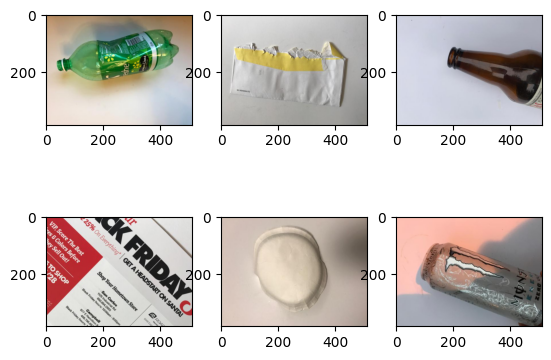

In [27]:
for i, img_path in enumerate(random.sample(img_list, 6)):
    img = load_img(img_path)
    img = img_to_array(img, dtype=np.uint8)

    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [33]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

test_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(300,300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0

)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [37]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 150, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 75, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 37, 37, 32)        0

In [38]:
model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
143/143 [==============================] - 463s 3s/step - loss: 1.6424 - acc: 0.2891 - val_loss: 1.6535 - val_acc: 0.3625
Epoch 2/20
143/143 [==============================] - 459s 3s/step - loss: 1.4552 - acc: 0.3994 - val_loss: 1.4277 - val_acc: 0.4143
Epoch 3/20
143/143 [==============================] - 455s 3s/step - loss: 1.3482 - acc: 0.4583 - val_loss: 1.3859 - val_acc: 0.4064
Epoch 4/20
143/143 [==============================] - 445s 3s/step - loss: 1.2891 - acc: 0.4706 - val_loss: 1.2983 - val_acc: 0.4542
Epoch 5/20
143/143 [==============================] - 451s 3s/step - loss: 1.1990 - acc: 0.5141 - val_loss: 1.4246 - val_acc: 0.3944
Epoch 6/20
143/143 [==============================] - 446s 3s/step - loss: 1.2000 - acc: 0.5409 - val_loss: 1.3452 - val_acc: 0.4223
Epoch 7/20
143/143 [==============================] - 451s 3s/step - loss: 1.1536 - acc: 0.5589 - val_loss: 1.2758 - val_acc: 0.5339
Epoch 8/20
143/143 [==============================] - 442s 3s/step - 

In [44]:
test_x, test_y = test_generator.__getitem__(l)

# Predict the labels for the test batch
preds = model.predict(test_x)

# Create a figure for plotting
plt.figure(figsize=(16, 16))

# Loop to create 16 subplots
for i in range(16):
    plt.subplot(4, 4, i+1)  # i+1 ensures the subplot index starts from 1 to 16
    plt.title('pred: %s / truth: %s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]), fontsize=10)
    plt.imshow(test_x[i])
    plt.axis('off')  # Turn off axis for better visibility of images

plt.tight_layout()
plt.show()

NameError: name 'l' is not defined